# Chrun Prediction 

We have severals columns : 
- customerID : ID of customer
- gender : customer gender
- SeniorCitizen : whether the customer is a senoir citizen or not
- Partner : whether the customer has a partner or not
- Dependants : whether the customer has dependants or not
- tenure : number of months the customer has stayed with the company
- PhoneService : whether the customer has a phone service or not
- MultipleLines : whether the customer has multiple lines or not
- InternetService : customer's internet service provider
- OnlineSecurity : whether the customer has online security or not
- OnlieBackup : whether the customer has online backup or not
- DeviceProtection : whether the customer has device protection or not
- TechSupport : whether the customer has tech support or not
- StreamingTV : whether the customer has streaming TV or not
- StreamingMovies : whether the customer has streaming movies or not
- Contract : the contract term of the customer
- PaperlessBilling : whether the customer has paperless billing or not
- PaymentMethod : the customer's payment method
- MonthlyCharges : the amount charged to the customer monthly
- TotalCharges : the total amount charged to the customer
- Churn : whether the customer churned or not

In [128]:
#Imports 
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [129]:
#Read data
df = pd.read_csv('churn-prediction.csv', dtype = {'gender' : str})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


First we don't need customerID columns, so we drop it. 

In [130]:
#Drop useless customerID columns
df.drop('customerID', axis = 1, inplace = True)

In [131]:
#Columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


It seems we don't have null values on our dataset, but when look closer dtypes columns, TotalCharges is an object columns. We will analyse why and convert it to float.
When we use pd.to_numeric, we have an error, because severals rows have " " as value, so we check these rows.

In [132]:
#Observation 
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()].shape

(11, 20)

It represent less than 1% of our total shape, so we drop it. 

In [133]:
#Drop blank total charges
df = df[df['TotalCharges'] != " "]
df.shape

(7032, 20)

In [134]:
#Convert total charges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtypes

dtype('float64')

Now we have a lot of object columns, let's check them.

In [135]:
#Create a function to display unique values of object columns
def unique_col_value(df) : 
    for col in df.select_dtypes('object').columns :
        print(f"{col :-<30} {df[col].unique()}")

In [136]:
unique_col_value(df)

gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn------------------------- ['No' 'Yes']


When we have "No internet service", we can replace by No, as well as "No phone service". 

In [137]:
#Replace useless values
for string in ["No internet service", "No phone service"] :
    df.replace(string, "No", inplace = True)

#Check result
unique_col_value(df)

gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes']
OnlineBackup------------------ ['Yes' 'No']
DeviceProtection-------------- ['No' 'Yes']
TechSupport------------------- ['No' 'Yes']
StreamingTV------------------- ['No' 'Yes']
StreamingMovies--------------- ['No' 'Yes']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn------------------------- ['No' 'Yes']


Now we can do binary encoding for yes/no columns as well as female/male column.

In [138]:
#Create a liste of yes/no columns
yes_no_col = []
for col in df.select_dtypes('object').columns : 
    if col in ["InternetService", "Contract", "PaymentMethod", "gender"] :
        continue
    else :
        yes_no_col.append(col)

#Binary encoding
for col in yes_no_col : 
    df[col].replace({"Yes" : 1, "No" : 0}, inplace = True)

#Check result 
for col in yes_no_col : 
    print(f"{col :-<30} {df[col].unique()}")

Partner----------------------- [1 0]
Dependents-------------------- [0 1]
PhoneService------------------ [0 1]
MultipleLines----------------- [0 1]
OnlineSecurity---------------- [0 1]
OnlineBackup------------------ [1 0]
DeviceProtection-------------- [0 1]
TechSupport------------------- [0 1]
StreamingTV------------------- [0 1]
StreamingMovies--------------- [0 1]
PaperlessBilling-------------- [1 0]
Churn------------------------- [0 1]


We use the same method for gender column.

In [139]:
#Binary encoding of gender columns
df['gender'].replace({'Female' : 1, "Male" : 0}, inplace = True)

#Check result 
for col in ["gender"] : 
    print(f"{col :-<30} {df[col].unique()}")

gender------------------------ [1 0]


The last object columns have more than two values, so it appropriate to use one hot encoding.

In [140]:
#One hot encoding
df_clean = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Now our data is ready.

### Exploratory data analysis

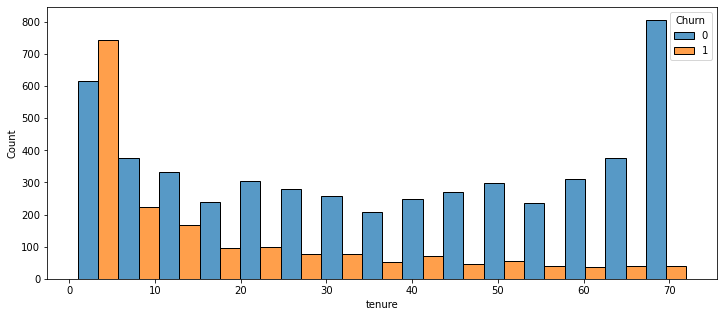

In [143]:
#Tenure analysis
plt.figure(figsize = (12,5))
sb.histplot(data = df_clean, x = 'tenure', hue = 'Churn', multiple = 'dodge')
plt.show()

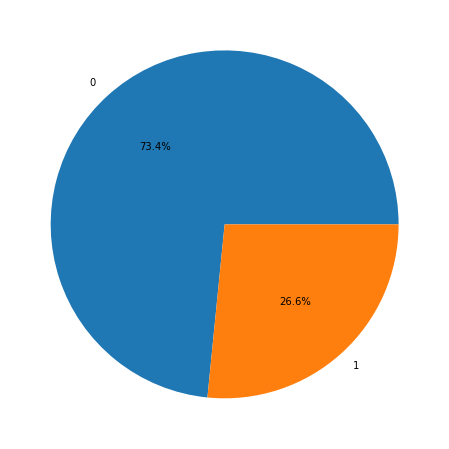

In [148]:
#Target balance
plt.figure(figsize = (12,8))
plt.pie(df_clean['Churn'].value_counts(), labels = df_clean['Churn'].unique(), autopct = "%1.1f%%")
plt.show()

We have a large majority of staying customers.

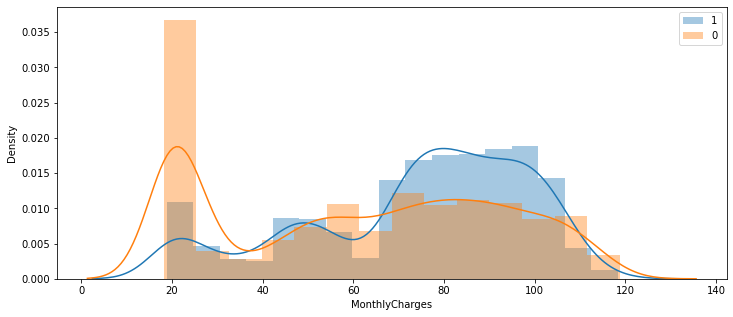

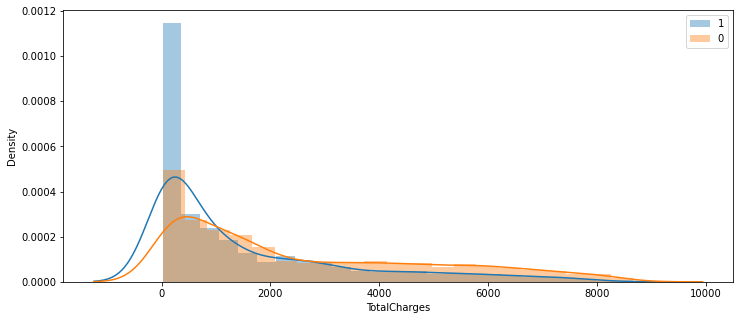

In [150]:
#Charges analysis
df_churn = df_clean[df_clean['Churn'] == 1]
df_non_churn = df_clean[df_clean['Churn'] == 0]

for col in ['MonthlyCharges', 'TotalCharges'] : 
    plt.figure(figsize = (12,5))
    sb.distplot(df_churn[col], label = "1")
    sb.distplot(df_non_churn[col], label = "0")
    plt.legend()
    plt.show()

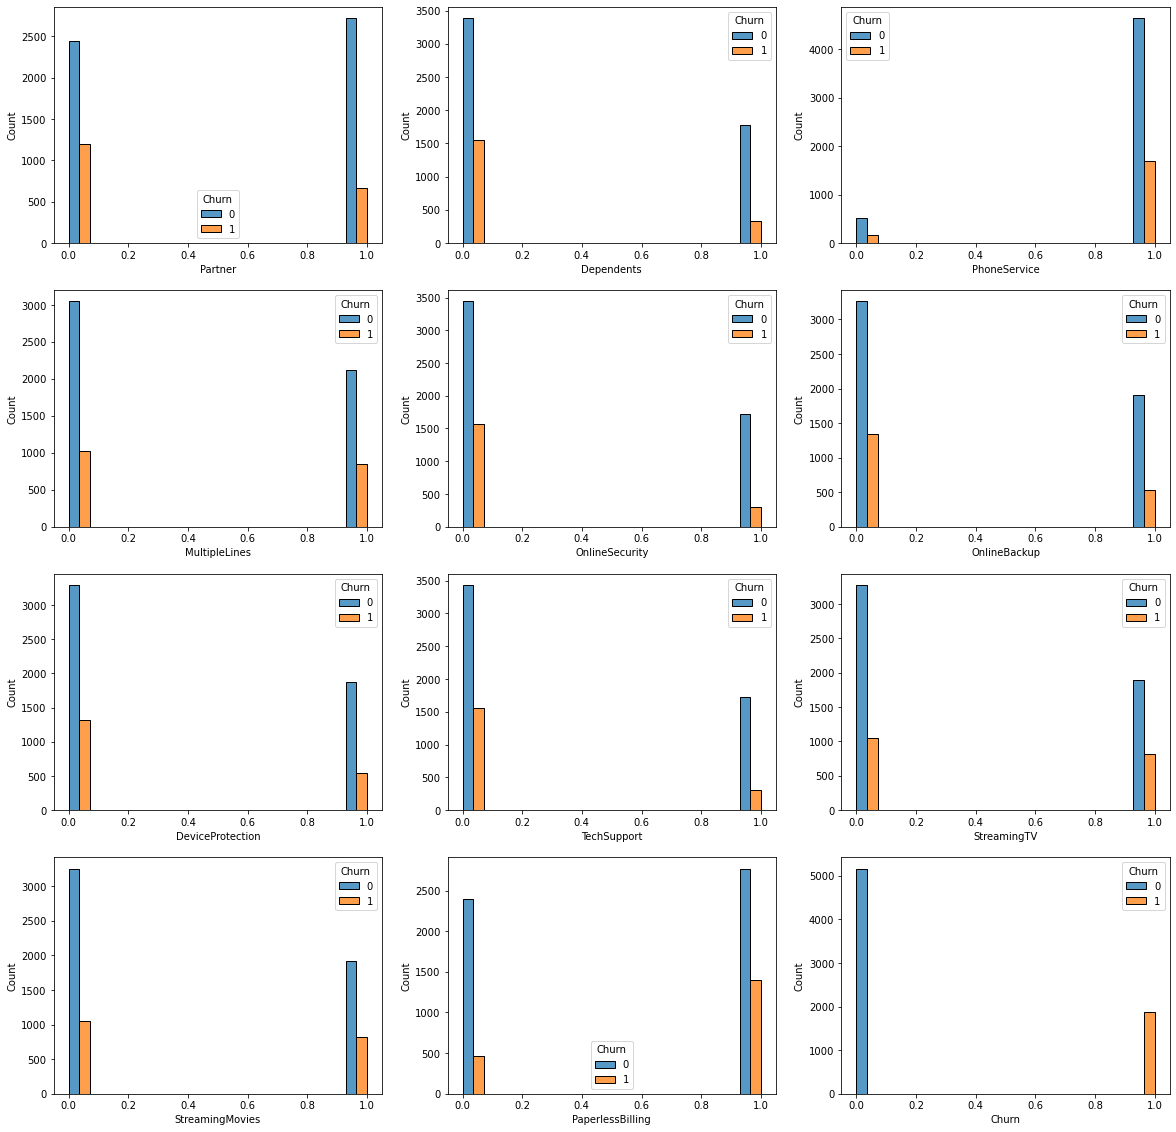

In [151]:
#Churn proportion on over columns
plt.figure(figsize=(20,20))
for index, col in enumerate(yes_no_col) : 
    plt.subplot(4, 3, index+1)
    sb.histplot(data = df_clean, x = col, hue = 'Churn', multiple = 'dodge')
plt.show()

### Preprocessing

In [ ]:
#Import 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from xgboost import XGBClassifier